# Basic `alphatools` workflow

1. load data and meta data
2. basic minimal preprocessing
3. perform PCA
4. plot PCA embeddings, variance and loadings

In [ ]:
%load_ext autoreload
%autoreload 2

import logging
from anndata import AnnData
import numpy as np
import pandas as pd

import alphatools as at
from alphatools.pl.figure import create_figure, label_axes
from alphatools.pl.plots import Plots


logging.basicConfig(level=logging.INFO)

## Load the data 

Dataset taken from datashare folder: https://datashare.biochem.mpg.de/s/sSYkOj22kM5AJ4O

In [ ]:
#### Change after merging, and use Lucas' code to load the DIA-NN data

# load protein groups into an AnnData object with index & columns as obs & var
url_data = "https://datashare.biochem.mpg.de/public.php/dav/files/NGxD86CQSbRWmzw/report.pg_matrix.tsv"
df = pd.read_csv(url_data, sep="\t")

url_metadata = "https://datashare.biochem.mpg.de/public.php/dav/files/sSYkOj22kM5AJ4O/simple_metadata.csv"
md = pd.read_csv(url_metadata, sep=",")

adata = AnnData(
    X=df.drop(columns=["Protein.Group", "Protein.Names", "Genes", "First.Protein.Description"]).to_numpy().T,
    obs=md,
    var=df[["Protein.Group", "Protein.Names", "Genes", "First.Protein.Description"]].set_index("Protein.Group"),
)

# overview of the data object
print(adata)

AnnData object with n_obs × n_vars = 18 × 4954
    obs: 'filename', 'replicate', 'fraction'
    var: 'Protein.Names', 'Genes', 'First.Protein.Description'


/Users/shanibm/Desktop/alphatools/venv_312/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


## Basic EDA on a synthetic example dataset:

1. Generate example data
2. Filter for data completeness on sample level
3. Visualize samples as histograms
4. Save data

### Filter by data completeness:

Remove features which have more than the allowed fraction of missing values

In [ ]:
print("The numeric data in the anndata object:")
display(adata.to_df().head())

print("The sample-level metadata in the anndata object:")
display(adata.obs.head())

print("The feature-level metadata in the anndata object:")
display(adata.var.head())

#  filter out features with more than 25 % missing values
print("Before filtering, the shape of the anndata object: ", adata.shape)
adata = at.pp.filter_data_completeness(adata=adata, max_missing=0.25, action="drop")
print("After filtering, the shape of the anndata object: ", adata.shape)

print("The numeric data in the anndata object:")
display(adata.to_df().head())

print("The sample-level metadata in the anndata object:")
display(adata.obs.head())

print("The feature-level metadata in the anndata object:")
display(adata.var.head())

The numeric data in the anndata object:


Protein.Group,A0A024R1R8;Q9Y2S6,A0A0B4J2F0,A0A0J9YX75;A0A0J9YXY3;P0DPF7,A0AV96,A0FGR8,A0JLT2,A0PJW6,A1L0T0,A1L390,A1X283,...,Q9Y6N5,Q9Y6N6,Q9Y6N7,Q9Y6N8,Q9Y6R0,Q9Y6V7,Q9Y6W5,Q9Y6X3,Q9Y6X9,Q9Y6Y8
0,9506220.0,9930580.0,NaN,6414570.0,29546900.0,NaN,19563300.0,23059400.0,1346120.0,11691800.0,...,39051400.0,172419.0,6796840.0,8998980.0,NaN,NaN,5111880.0,NaN,NaN,7060290.0
1,25866000.0,NaN,NaN,18604800.0,18958500.0,3202770.0,NaN,14090600.0,790375.0,23128600.0,...,10291200.0,NaN,3829290.0,NaN,574729.0,19405500.0,6310680.0,10867000.0,11684000.0,13398300.0
2,10150200.0,11627800.0,NaN,6550420.0,28679800.0,NaN,19387300.0,24248100.0,963907.0,9263040.0,...,38928800.0,NaN,5441930.0,9034600.0,1026870.0,NaN,3963610.0,NaN,NaN,6189950.0
3,14660600.0,8741560.0,NaN,9638120.0,35471700.0,NaN,15716300.0,36269500.0,NaN,11779400.0,...,33905400.0,237138.0,5068170.0,7413300.0,965536.0,NaN,4858220.0,NaN,NaN,6046510.0
4,23477900.0,1497570.0,NaN,16496400.0,27413400.0,NaN,2334540.0,24950500.0,NaN,21687600.0,...,8834620.0,187094.0,3736040.0,4581280.0,1516620.0,NaN,7919380.0,NaN,NaN,9935580.0


The sample-level metadata in the anndata object:


,filename,replicate,fraction
0,20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_1...,Map2,3K
1,20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_1...,Map1,12K
2,20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_1...,Map1,1K
3,20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_1...,Map1,24K
4,20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_1...,Map1,3K


The feature-level metadata in the anndata object:


,Protein.Names,Genes,First.Protein.Description
Protein.Group,,,
A0A024R1R8;Q9Y2S6,TMA7B_HUMAN;TMA7_HUMAN,TMA7;TMA7B,Translation machinery-associated protein 7B
A0A0B4J2F0,PIOS1_HUMAN,PIGBOS1,Protein PIGBOS1
A0A0J9YX75;A0A0J9YXY3;P0DPF7,TVB62_HUMAN;TVB63_HUMAN;TVB69_HUMAN,TRBV6-2;TRBV6-3;TRBV6-9,T cell receptor beta variable 6-9
A0AV96,RBM47_HUMAN,RBM47,RNA-binding protein 47
A0FGR8,ESYT2_HUMAN,ESYT2,Extended synaptotagmin-2


INFO:root:pp.filter_data_completeness(): flag 2123 / 4954 features with >0.25 missing in any group.


Before filtering, the shape of the anndata object:  (18, 4954)
After filtering, the shape of the anndata object:  (18, 4954)
The numeric data in the anndata object:


Protein.Group,A0A024R1R8;Q9Y2S6,A0A0B4J2F0,A0A0J9YX75;A0A0J9YXY3;P0DPF7,A0AV96,A0FGR8,A0JLT2,A0PJW6,A1L0T0,A1L390,A1X283,...,Q9Y6N5,Q9Y6N6,Q9Y6N7,Q9Y6N8,Q9Y6R0,Q9Y6V7,Q9Y6W5,Q9Y6X3,Q9Y6X9,Q9Y6Y8
0,9506220.0,9930580.0,NaN,6414570.0,29546900.0,NaN,19563300.0,23059400.0,1346120.0,11691800.0,...,39051400.0,172419.0,6796840.0,8998980.0,NaN,NaN,5111880.0,NaN,NaN,7060290.0
1,25866000.0,NaN,NaN,18604800.0,18958500.0,3202770.0,NaN,14090600.0,790375.0,23128600.0,...,10291200.0,NaN,3829290.0,NaN,574729.0,19405500.0,6310680.0,10867000.0,11684000.0,13398300.0
2,10150200.0,11627800.0,NaN,6550420.0,28679800.0,NaN,19387300.0,24248100.0,963907.0,9263040.0,...,38928800.0,NaN,5441930.0,9034600.0,1026870.0,NaN,3963610.0,NaN,NaN,6189950.0
3,14660600.0,8741560.0,NaN,9638120.0,35471700.0,NaN,15716300.0,36269500.0,NaN,11779400.0,...,33905400.0,237138.0,5068170.0,7413300.0,965536.0,NaN,4858220.0,NaN,NaN,6046510.0
4,23477900.0,1497570.0,NaN,16496400.0,27413400.0,NaN,2334540.0,24950500.0,NaN,21687600.0,...,8834620.0,187094.0,3736040.0,4581280.0,1516620.0,NaN,7919380.0,NaN,NaN,9935580.0


The sample-level metadata in the anndata object:


,filename,replicate,fraction
0,20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_1...,Map2,3K
1,20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_1...,Map1,12K
2,20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_1...,Map1,1K
3,20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_1...,Map1,24K
4,20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_1...,Map1,3K


The feature-level metadata in the anndata object:


,Protein.Names,Genes,First.Protein.Description,passed_threshold_missing_values
Protein.Group,,,,
A0A024R1R8;Q9Y2S6,TMA7B_HUMAN;TMA7_HUMAN,TMA7;TMA7B,Translation machinery-associated protein 7B,True
A0A0B4J2F0,PIOS1_HUMAN,PIGBOS1,Protein PIGBOS1,False
A0A0J9YX75;A0A0J9YXY3;P0DPF7,TVB62_HUMAN;TVB63_HUMAN;TVB69_HUMAN,TRBV6-2;TRBV6-3;TRBV6-9,T cell receptor beta variable 6-9,False
A0AV96,RBM47_HUMAN,RBM47,RNA-binding protein 47,True
A0FGR8,ESYT2_HUMAN,ESYT2,Extended synaptotagmin-2,True


## Creating new layers prior to preprocessing

This way, we can save the raw data and try different pp steps on the raw data.

In [ ]:
# save the raw data before log transformation
adata.layers["raw"] = adata.X.copy()

# log2 transform the data
adata.X = np.log2(adata.X + 1)

### Visualize the distribution of values in different levels of an observational metadata variable

In this example, check the distribution of "gene_1" expression values per cell type.

INFO:root:Column 'A1L0T0' found in: data.var_names. Using that
INFO:root:Column 'A1L0T0' found in: data.var_names. Using that
INFO:root:Column 'replicate' found in: data.obs.columns. Using that
/Users/shanibm/Desktop/alphatools/src/alphatools/pl/colors.py:226: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if na_values:


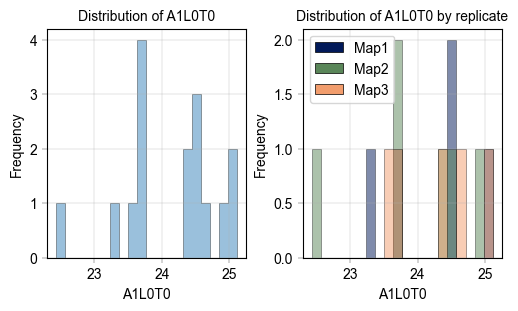

In [ ]:
# Apply the AxisManager to make axes iterable and apply consistent AlphaTools styling.
# Axes can also be accessed directly by indexing the axm object.
fig, axm = create_figure(nrows=1, ncols=2, figsize=(5, 3))

# Plot.histogram handles adata natively. Columns from the data and metadata are accessible
# Focus on the distribution of protein A1L0T0
ax = axm.next()
Plots.histogram(
    data=adata,
    value_column="A1L0T0",
    bins=20,
    legend="auto",
    ax=ax,
    hist_kwargs={"alpha": 0.5, "histtype": "stepfilled", "linewidth": 0.5, "edgecolor": "black"},
)
label_axes(ax, "A1L0T0", "Frequency", "Distribution of A1L0T0")

# Focus on the distribution of protein A1L0T0 in the different replicates
ax = axm.next()
Plots.histogram(
    data=adata,
    value_column="A1L0T0",
    color_map_column="replicate",
    bins=20,
    legend="auto",
    ax=ax,
    hist_kwargs={"alpha": 0.5, "histtype": "stepfilled", "linewidth": 0.5, "edgecolor": "black"},
)
label_axes(ax, "A1L0T0", "Frequency", "Distribution of A1L0T0 by replicate")

# # save figure
# save_figure(
#     fig=fig,
#     filename="sample_histogram.png",
#     output_dir=output_directory,
#     dpi=300,
#     transparent=False,
# )

### Running PCA

Before running PCA, we need to filter out NaN values. PCA can not be computed on matrices with missing values. Therefore, prior to PCA, we will create a list of 'core proteins' of proteins detected in all observations, save it in the feature meta data frame (adata.var)

In [ ]:
# add a new column to the adata.var object with the name "is_core" to indicate whether the feature is part of the core proteome
adata = at.pp.filter_data_completeness(adata, max_missing=0, action="flag", var_colname="is_core")

# view hoe many features are part of the core proteome
print("The number of features in the core proteome:")
print(adata.var["is_core"].value_counts())

INFO:root:pp.filter_data_completeness(): flag 3148 / 4954 features with >0.00 missing in any group.


The number of features in the core proteome:
is_core
False    3148
True     1806
Name: count, dtype: int64


Now we can run PCA, specifying the adata.var column that filters the proteins by 100% completeness:

In [ ]:
# this function is now implemented on sample level (PCA of the observations).
at.tl.pca(adata, meta_data_mask_column_name="is_core", n_comps=10)

# view the PCA results
print("The dimensions of PC coordinates in the adata.obsm are (n_obs x n_comp):")
print(adata.obsm["X_pca_obs"].shape)
print("The PCA loadings in the adata.varm are (n_var x n_comp):")
print(adata.varm["PCs_obs"].shape)
print("Ratio of explained variance (n_comp):")
print(adata.uns["variance_pca_obs"]["variance_ratio"])
print("The explained variance (n_comp):")
print(adata.uns["variance_pca_obs"]["variance"])

INFO:alphatools.tl.embeddings:computing PCA


The dimensions of PC coordinates in the adata.obsm are (n_obs x n_comp):
(18, 10)
The PCA loadings in the adata.varm are (n_var x n_comp):
(4954, 10)
Ratio of explained variance (n_comp):
[0.56593504 0.33056594 0.06844902 0.01339105 0.00388991 0.00288049
 0.0023081  0.00220095 0.00194543 0.0017315 ]
The explained variance (n_comp):
[1009.50632405  589.65850994  122.09831939   23.88675892    6.93875425
    5.13817412    4.11715411    3.92601867    3.47022027    3.08861607]


In addition to running PCA to get a dimentional reduction of the observations (samples), we can also perform PCA on the features (proteins). 

In [ ]:
# Now run PCA on the protein space to get their projection in the PCA space.
at.tl.pca(adata, meta_data_mask_column_name="is_core", n_comps=10, dim_space="var")

# view the PCA results for features
print("----- PCA ON FEATURES -----")
print("The dimensions of PC coordinates in the adata.varm are (n_obs x n_comp):")
print(adata.varm["X_pca_var"].shape)
print("The PCA loadings of the samples in the adata.obsm are (n_var x n_comp):")
print(adata.obsm["PCs_var"].shape)
print("Ratio of explained variance (n_comp):")
print(adata.uns["variance_pca_var"]["variance_ratio"])
print("The explained variance (n_comp):")
print(adata.uns["variance_pca_var"]["variance"])

INFO:alphatools.tl.embeddings:computing PCA


----- PCA ON FEATURES -----
The dimensions of PC coordinates in the adata.varm are (n_obs x n_comp):
(4954, 10)
The PCA loadings of the samples in the adata.obsm are (n_var x n_comp):
(18, 10)
Ratio of explained variance (n_comp):
[8.07567317e-01 1.13818512e-01 6.33157115e-02 8.74927065e-03
 2.21018860e-03 7.89962453e-04 5.76627224e-04 4.64255895e-04
 4.48561680e-04 3.63473757e-04]
The explained variance (n_comp):
[6.64865141e+01 9.37060716e+00 5.21274308e+00 7.20322002e-01
 1.81963451e-01 6.50371166e-02 4.74733601e-02 3.82218986e-02
 3.69298036e-02 2.99245680e-02]


### Plot PCA results 
We can plot the PCA results on a 2D projection, look at the explained var in each PC using the scree plot, and plot the loadings od the PCs, either per PC or a scatter of 2 PCs, to understand their 'drivers'. 

INFO:root:Column 'replicate' found in: data.obs.columns. Using that
INFO:root:Column 'replicate' found in: data.obs.columns. Using that
/Users/shanibm/Desktop/alphatools/src/alphatools/pl/colors.py:226: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if na_values:


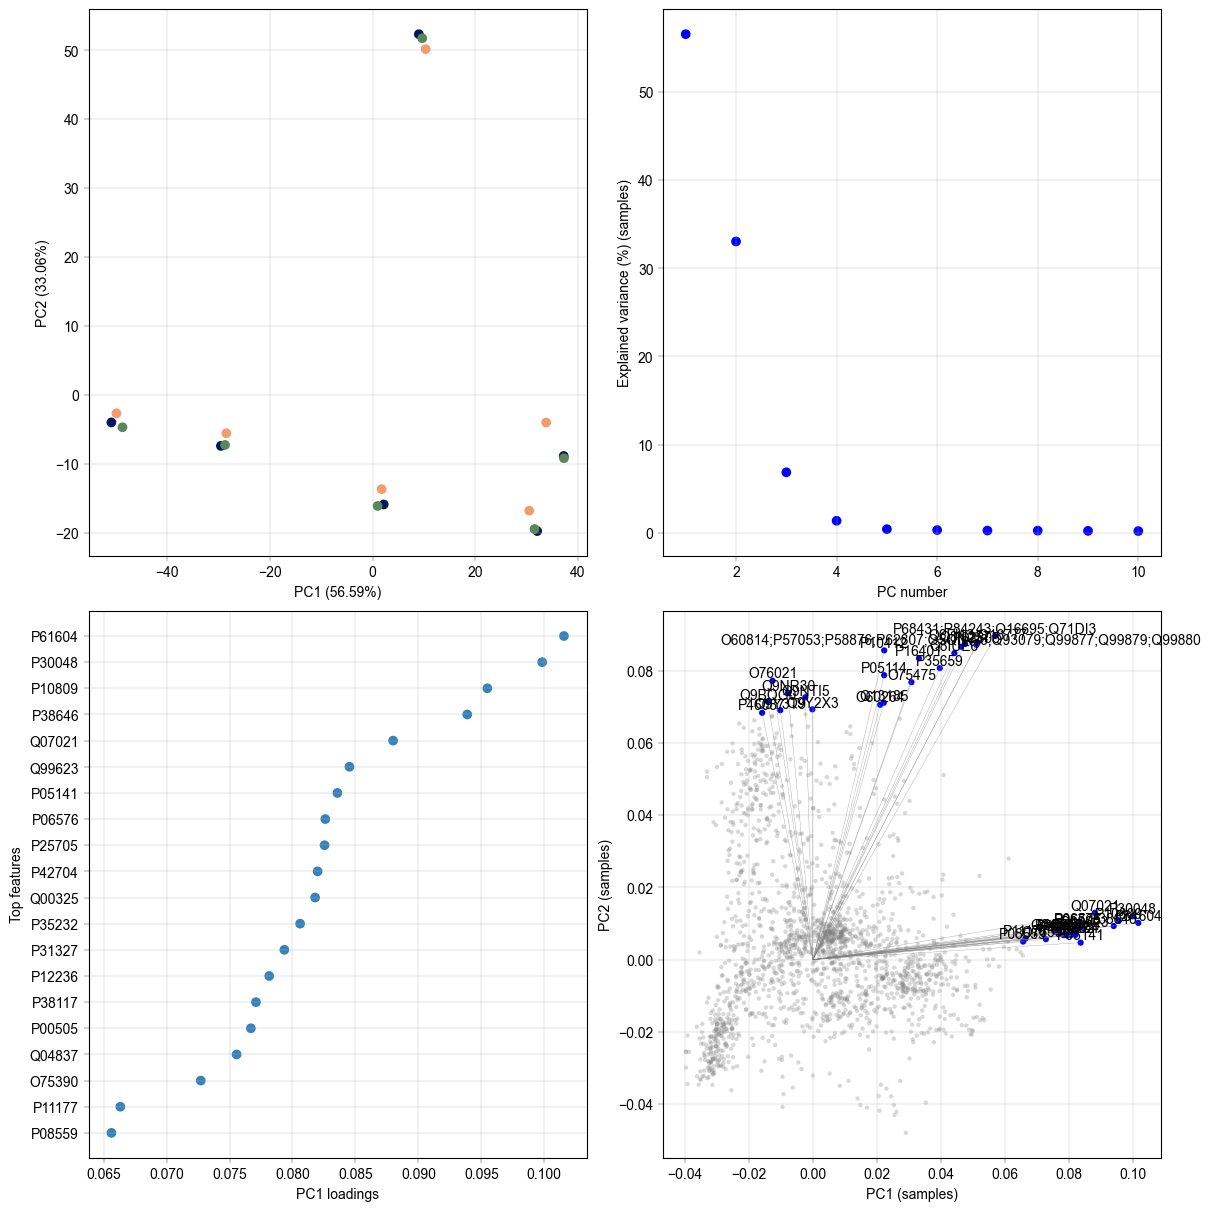

In [ ]:
fig, axm = create_figure(2, 2, figsize=(12, 12))

ax = axm.next()
# PCA plot colored by replicate
Plots.plot_pca(
    data=adata,
    ax=ax,
    x_column=1,
    y_column=2,
    label=False,
    label_column=None,
    embbedings_name=None,
    color_map_column="replicate",
)

# scree plot to show the explained variance by each PC
ax = axm.next()
Plots.scree_plot(adata=adata, ax=ax, n_pcs=50)

# top loadings of the first PC
ax = axm.next()
Plots.plot_pca_loadings(
    data=adata,
    ax=ax,
    dim=1,
    nfeatures=20,
)

# 2d loading plot with highlighted top 20 loadings
ax = axm.next()
Plots.plot_pca_loadings_2d(
    data=adata,
    ax=ax,
    pc_x=1,
    pc_y=2,
    nfeatures=20,
    add_labels=True,
    add_lines=True,
    scatter_kwargs=None,
)

### Plot PCA results for feature PCA 
Just like the PCA on the samples, we can plot the same plots for the results of PCA calculated on the features.  

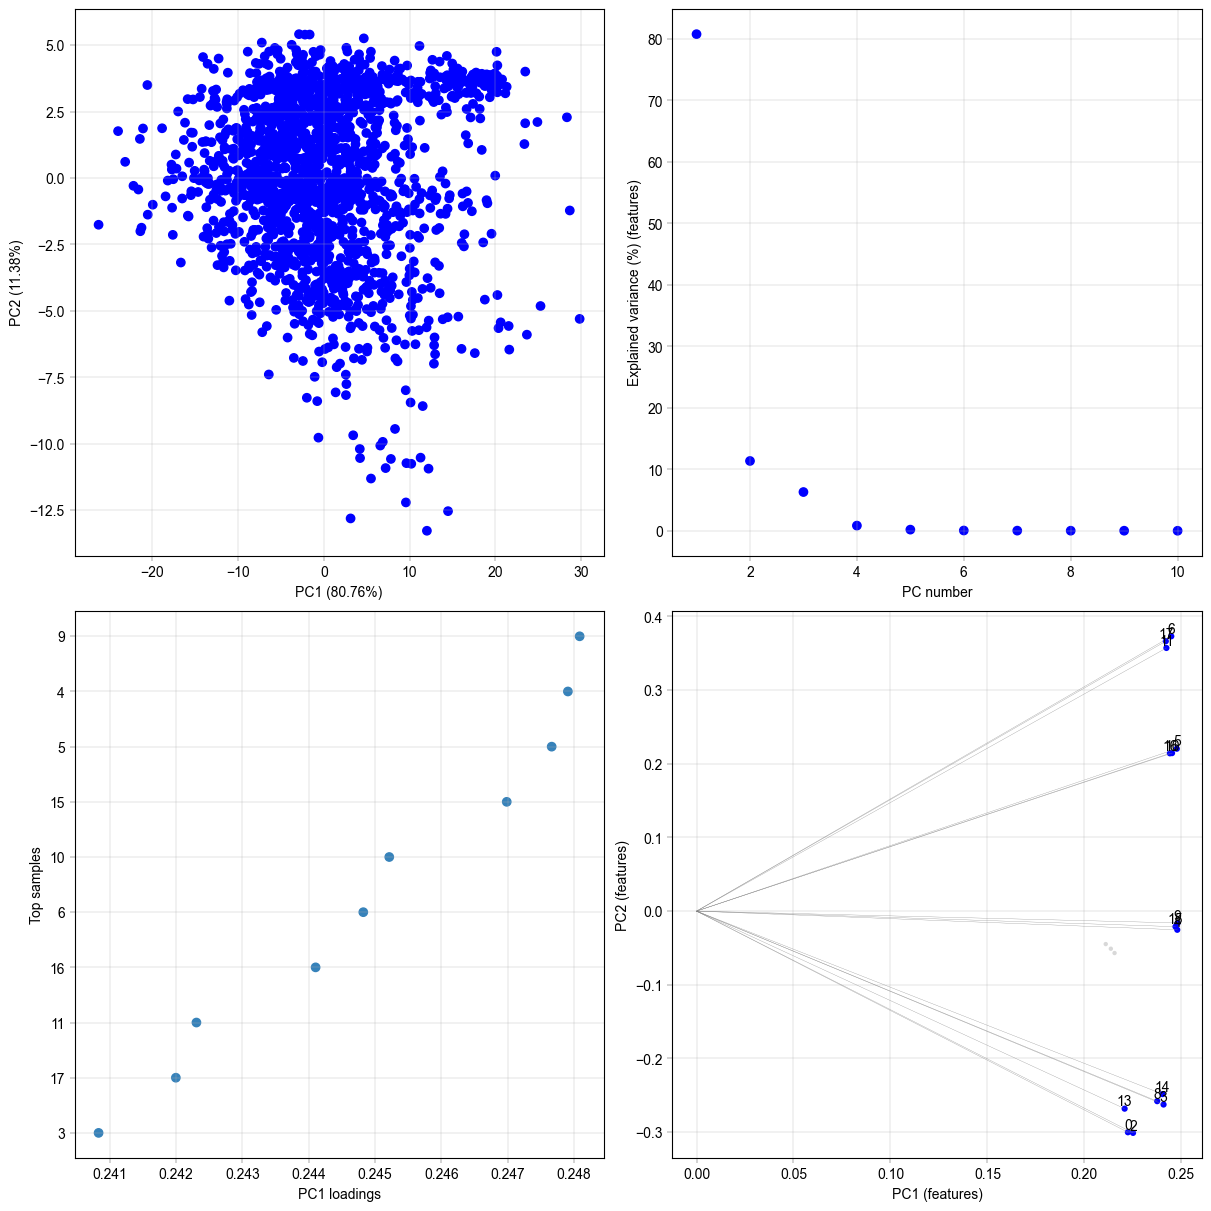

In [ ]:
# now produce the PCAs plot for the features
fig, axm = create_figure(2, 2, figsize=(12, 12))

ax = axm.next()
Plots.plot_pca(
    data=adata,
    ax=ax,
    x_column=1,
    y_column=2,
    dim_space="var",
    label=False,
    label_column=None,
    embbedings_name=None,
)

ax = axm.next()
Plots.scree_plot(adata=adata, ax=ax, n_pcs=50, dim_space="var")

ax = axm.next()
Plots.plot_pca_loadings(data=adata, ax=ax, dim=1, nfeatures=10, dim_space="var")

ax = axm.next()
Plots.plot_pca_loadings_2d(
    data=adata,
    ax=ax,
    pc_x=1,
    pc_y=2,
    nfeatures=10,
    add_labels=True,
    add_lines=True,
    scatter_kwargs=None,
    dim_space="var",
)

### UMAP Visualization with Scanpy

To explore and visualize the high-dimensional proteomics data, we use **UMAP (Uniform Manifold Approximation and Projection)** as implemented in **Scanpy**. UMAP projects complex, high-dimensional feature spaces into a lower-dimensional space (typically 2D) while preserving the local and global structure of the data. This allows us to identify clusters, relationships, and potential outliers in the proteomic profiles at a glance.

In this notebook, Scanpy’s `sc.pp.neighbors()` and `sc.tl.umap()` functions are applied to the processed data matrix to compute a nearest-neighbor graph and then generate UMAP coordinates. We will use the sample PCA matrix for neighbor calculations. The resulting UMAP embedding provides an intuitive visualization of sample similarity and grouping based on proteomic features, complementing downstream analyses such as clustering or differential expression.


In [ ]:
import scanpy as sc

sc.pp.neighbors(adata, n_neighbors=10, use_rep="X_pca_obs")  # use the PCA results on samples
sc.tl.umap(adata)

/Users/shanibm/Desktop/alphatools/venv_312/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# location of the umap coordinates in the adata.obsm
print("The UMAP coordinates in the adata.obsm are in adata.obsm['X_umap'] with shape: ", adata.obsm["X_umap"].shape)
print(adata.obsm["X_umap"])

The UMAP coordinates in the adata.obsm are in adata.obsm['X_umap'] with shape:  (18, 2)
[[23.248234   -1.2672713 ]
 [22.80575    -0.08841316]
 [23.620588   -0.6427061 ]
 [24.165075   -1.5532923 ]
 [24.523983   -0.21402165]
 [25.940697   -1.1079656 ]
 [26.18492     0.780279  ]
 [23.35512     0.42271757]
 [24.21046    -2.5432775 ]
 [24.973011   -0.9202459 ]
 [26.795399   -0.45468578]
 [26.0829     -0.18279085]
 [24.299662    0.8317656 ]
 [22.442497   -1.0312376 ]
 [25.063112   -2.0696015 ]
 [23.163307   -2.339625  ]
 [26.056355   -1.930257  ]
 [25.28021     0.37642172]]


### Plot UMAP
We can either plot the UMAP results using scanpy's plotting function, or we can use AlphaTools plotting function, with adding the umap coordinates directly to the obs df.


... storing 'replicate' as categorical
... storing 'fraction' as categorical
... storing 'Genes' as categorical
... storing 'First.Protein.Description' as categorical


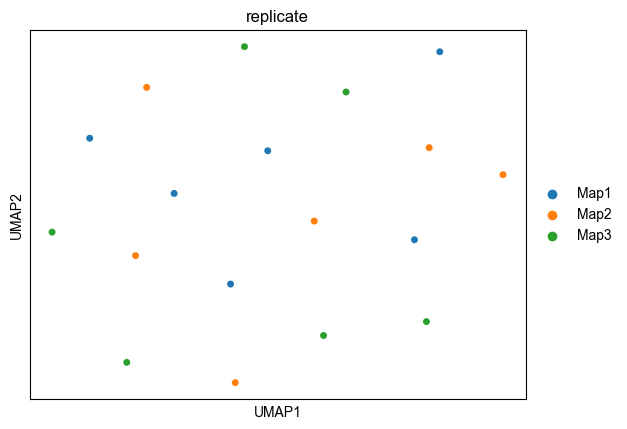

In [ ]:
# scanpy's plotting function
sc.pl.umap(adata, color="replicate", size=100)  # the size is usually much smaller

Another option is to copy the coordinates into the `adata.obs` data frame, to plot in using `scatter` function in `alphatools` package

INFO:root:Column 'replicate' found in: data.obs.columns. Using that
INFO:root:Column 'replicate' found in: data.obs.columns. Using that
/Users/shanibm/Desktop/alphatools/src/alphatools/pl/colors.py:226: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if na_values:
INFO:root:Column 'UMAP1' found in: data.obs.columns. Using that
INFO:root:Column 'UMAP2' found in: data.obs.columns. Using that


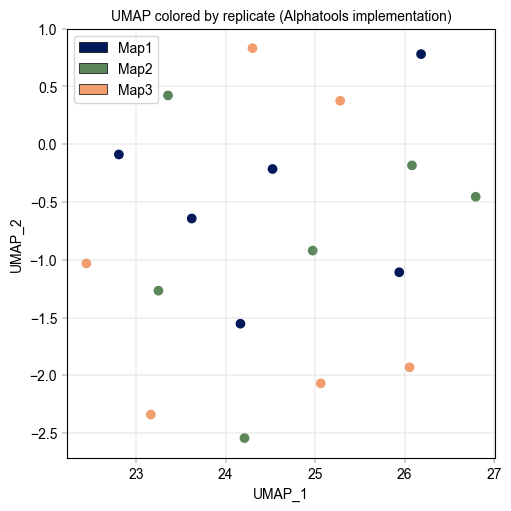

In [ ]:
adata.obs["UMAP1"] = adata.obsm["X_umap"][:, 0]
adata.obs["UMAP2"] = adata.obsm["X_umap"][:, 1]

fig, axm = create_figure(1, 1, figsize=(5, 5))
ax = axm.next()
Plots.scatter(adata, x_column="UMAP1", y_column="UMAP2", color_map_column="replicate", ax=ax, legend="auto")

label_axes(
    ax=ax,
    xlabel="UMAP_1",
    ylabel="UMAP_2",
    title="UMAP colored by replicate (Alphatools implementation)",
)